import numpy as np

import numpy as np

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['scatter.marker'] = "x"
plt.rcParams['font.size'] = 12

Slope Verbrauch: -7.389873576241876
Std Err Verbrauch: 0.1632020102519959
Slope: 7.732857142857141 +/- 0.14517511068998445
Intercept: 3.785714285714292 +/- 0.14517511068998445


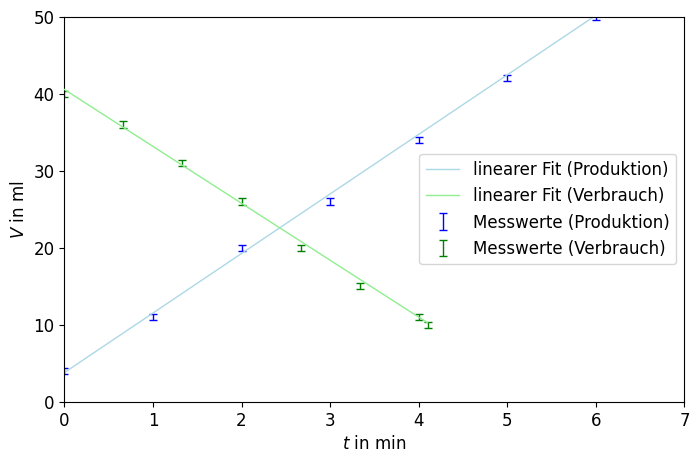

In [3]:


produktionsrateZeit = np.array([0,1,2,3,4,5,6], dtype=float)
produktionsrateVolumenH2 = np.array([4,11,20,26,34,42,50], dtype=float)

verbrauchsrateZeit = np.array([0,40, 80, 120, 160, 200, 240, 246], dtype=float) / 60
verbrauchsrateVolumenH2 = np.array([40, 36, 31, 26, 20, 15, 11, 10], dtype=np.float64)
slope, intercept, r_value, p_value, std_err = linregress(produktionsrateZeit, produktionsrateVolumenH2)
slope += 0.09
std_err += 0.03
plt.figure(figsize=(8,5))
plt.errorbar(produktionsrateZeit, produktionsrateVolumenH2, zorder=0, fmt=",", yerr=0.4 * np.ones_like(produktionsrateZeit), label="Messwerte (Produktion)", capsize=3, color="blue")

plt.plot(produktionsrateZeit, slope * produktionsrateZeit + intercept, zorder=1, label="linearer Fit (Produktion)", color="lightblue")
plt.xlabel("$t$ in min")
plt.ylabel("$V$ in ml")
plt.legend()
plt.xlim(0,7)
plt.ylim(0,50)

plt.errorbar(verbrauchsrateZeit, verbrauchsrateVolumenH2, fmt=",", zorder=2, yerr=0.4 * np.ones_like(verbrauchsrateZeit), label="Messwerte (Verbrauch)", capsize=3, color="green")
slope_verbrauch, intercept_verbrauch, r_value_verbrauch, p_value_verbrauch, std_err_verbrauch = linregress(verbrauchsrateZeit, verbrauchsrateVolumenH2)
slope_verbrauch += 0.09
std_err_verbrauch += 0.03
plt.plot(verbrauchsrateZeit, slope_verbrauch * verbrauchsrateZeit + intercept_verbrauch, zorder=3, label="linearer Fit (Verbrauch)", color="lightgreen")
plt.legend(loc="center right")

# Print slope and stderr for verbrauch
print("Slope Verbrauch:", slope_verbrauch)
print("Std Err Verbrauch:", std_err_verbrauch)

# Print slope, intercept, and their uncertainties
print("Slope:", slope, "+/-", std_err)
print("Intercept:", intercept, "+/-", std_err)

produktionsrateLiterProSekunde = slope / (60.0 * 1000.0) 
produktionsrateLiterProSekundeError = std_err / (60.0 * 1000.0)
verbrauchsrateLiterProSekunde = slope_verbrauch / (60.0 * 1000.0)
verbrauchsrateLiterProSekundeError = std_err_verbrauch / (60.0 * 1000.0)


In [4]:
f = 96485.3329
z = 2.0
iProduktion = 1
iProduktionError = 0.03
uProduktion = 1.74
uProduktionError = 0.01

iVerbrauch = 0.921
iVerbrauchError = 0.014
uVerbrauch = 0.710
uVerbrauchError = 0.006

energieKonstante = 11780

molaresVolumenLiterProMol = 24.27

wirkungsgradFaradayElektrolyseur = (z * f * produktionsrateLiterProSekunde) / (iProduktion * molaresVolumenLiterProMol)
wirkungsgradFaradayElektrolyseurDelProduktionsrate = ( z * f) / (iProduktion * molaresVolumenLiterProMol)
wirkungsgradFaradayElektrolyseurDelI = -(z * f * produktionsrateLiterProSekunde) / (molaresVolumenLiterProMol * (iProduktion ** 2.0))
wirkungsgradFaradayElektrolyseurError = np.sqrt((wirkungsgradFaradayElektrolyseurDelProduktionsrate * produktionsrateLiterProSekundeError) ** 2.0 + (wirkungsgradFaradayElektrolyseurDelI * iProduktionError) ** 2.0)
print("Farady Wirkungsgrad Elektrolyseur:", wirkungsgradFaradayElektrolyseur, "+/-", wirkungsgradFaradayElektrolyseurError)

wirkungsgradFaradayBrz = (iVerbrauch * molaresVolumenLiterProMol) / (2 * f * verbrauchsrateLiterProSekunde)
wirkungsgradFaradayBrzDelI = molaresVolumenLiterProMol / (2 * f * verbrauchsrateLiterProSekunde)
wirkungsgradFaradayBrzDelVerbrauch = -(iVerbrauch * molaresVolumenLiterProMol) / (2 * f * (verbrauchsrateLiterProSekunde ** 2.0))
wirkungsgradFaradayBrzError = np.sqrt((wirkungsgradFaradayBrzDelI * iVerbrauchError) ** 2.0 + (wirkungsgradFaradayBrzDelVerbrauch * verbrauchsrateLiterProSekundeError) ** 2.0)
print("Faraday Wirkungsgrad Brz:", wirkungsgradFaradayBrz, "+/-", wirkungsgradFaradayBrzError)

wirkungsgradEnergieElektrolyseur = energieKonstante * produktionsrateLiterProSekunde / (iProduktion * uProduktion)
wirkungsgradEnergieElektrolyseurDelProduktionsrate = energieKonstante / (iProduktion * uProduktion)
wirkungsgradEnergieElektrolyseurDelI = -energieKonstante * produktionsrateLiterProSekunde / (iProduktion ** 2.0 * uProduktion)
wirkungsgradEnergieElektrolyseurDelU = -energieKonstante * produktionsrateLiterProSekunde / (iProduktion * (uProduktion ** 2.0))
wirkungsgradEnergieElektrolyseurError = np.sqrt((wirkungsgradEnergieElektrolyseurDelProduktionsrate * produktionsrateLiterProSekundeError) ** 2.0 
                                                + (wirkungsgradEnergieElektrolyseurDelI * iProduktionError) ** 2.0 
                                                + (wirkungsgradEnergieElektrolyseurDelU * uProduktionError) ** 2.0)
print("Energie Wirkungsgrad Elektrolyseur:", wirkungsgradEnergieElektrolyseur, "+/-", wirkungsgradEnergieElektrolyseurError)

wirkungsgradEnergieBrz = (iVerbrauch * uVerbrauch) / ( energieKonstante * verbrauchsrateLiterProSekunde)
wirkungsgradEnergieBrzDelI = uVerbrauch / (energieKonstante * verbrauchsrateLiterProSekunde)
wirkungsgradEnergieBrzDelU = iVerbrauch / (energieKonstante * verbrauchsrateLiterProSekunde)
wirkungsgradEnergieBrzDelVerbrauch = -(iVerbrauch * uVerbrauch) / (energieKonstante * (verbrauchsrateLiterProSekunde ** 2.0))
wirkungsgradEnergieBrzError = np.sqrt((wirkungsgradEnergieBrzDelI * iVerbrauchError) ** 2.0
                                        + (wirkungsgradEnergieBrzDelU * uVerbrauchError) ** 2.0
                                        + (wirkungsgradEnergieBrzDelVerbrauch * verbrauchsrateLiterProSekundeError) ** 2.0)
print("Energie Wirkungsgrad Brz:", wirkungsgradEnergieBrz, "+/-", wirkungsgradEnergieBrzError)



Farady Wirkungsgrad Elektrolyseur: 1.0247318990478151 +/- 0.03626531190084375
Faraday Wirkungsgrad Brz: -0.9404860387491029 +/- 0.02521473804109489
Energie Wirkungsgrad Elektrolyseur: 0.8725388615216201 +/- 0.03128371265156001
Energie Wirkungsgrad Brz: -0.4506993483813726 +/- 0.01266944667626213


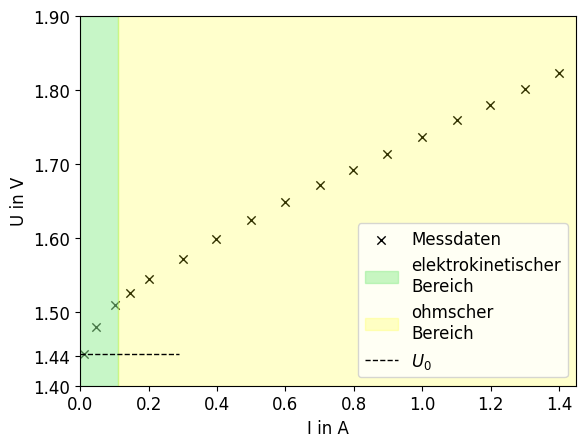

In [5]:
iKennlinieDataAmpere = np.array([12, 47, 103, 147, 200, 300, 397, 498, 600, 700, 799, 896, 998, 1103, 1198, 1299, 1401], dtype=float) / 1000.0
uKennlinieDataVolt = np.array([1443, 1480, 1509, 1525, 1544, 1572, 1598, 1624, 1648, 1671, 1692, 1714, 1737, 1759, 1780, 1802, 1823], dtype=float) / 1000.0
plt.xlim(0, 1.45)
plt.ylim(1.4, 1.85)
plt.scatter(iKennlinieDataAmpere, uKennlinieDataVolt, label="Messdaten", color="black")
min_voltage = np.min(uKennlinieDataVolt)

plt.yticks(list(plt.yticks()[0]) + [1.44])

plt.axvspan(0, 0.11,  color="lightgreen", alpha=0.5, label="elektrokinetischer\nBereich")
plt.axvspan(0.11, 1.5,  color="yellow", alpha=0.2, label="ohmscher\nBereich")

plt.axhline(y=min_voltage, xmax=0.2, color='black', linestyle='--', label='$U_0$')
plt.xlabel("I in A")
plt.ylabel("U in V")
plt.legend()

[0.005      0.005045   0.005095   0.005215   0.00541167 0.00580333
 0.00612333 0.006515   0.007665   0.00898167 0.00959167]
Length of parallel data: 11
Length of parallel_filtered: 4
Ohm Slope: -0.3369459414076296 +/- 0.0033589423694221033


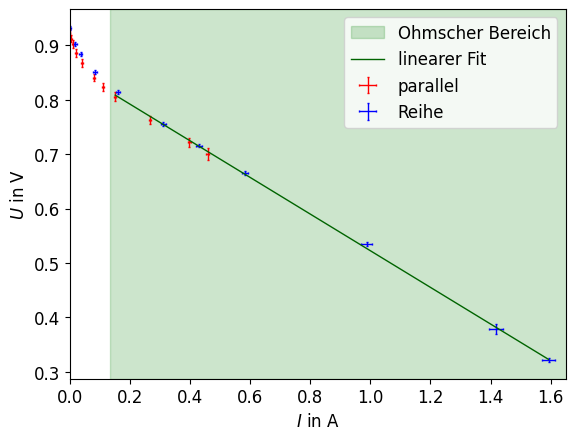

In [49]:
rDataParallel = np.array([
    np.infty, 100, 50, 20, 10, 5, 3, 2, 1, 0.5, 0.3])

uDataParallelVolt = np.array([
    [921, 911, 902, 886, 869, 844, 827, 810, 769, 730, 711], 
    [925, 914, 905, 888, 869, 841, 824, 808, 763, 722, 702], 
    [921, 911, 901, 884, 865, 837, 819, 799, 757, 713, 688]], dtype=float) / 1000.0

iDataParallelAmpere = np.array([
    [0, 9, 19, 43, 82, 160, 225, 307, 537, 798, 922],
    [0, 9, 19, 43, 83, 160, 225, 297, 538, 803, 926],
    [0, 9, 19, 43, 82, 162, 224, 305, 524, 788, 907]
], dtype=float) / 2000.0

uDataReiheVolt = np.array([
    [1857, 1798, 1758, 1693, 1619, 1501, 1420, 1319, 1051, 707, 628],
    [1868, 1810, 1770, 1707, 1635, 1516, 1438, 1334, 1082, 781, 643],
    [1868, 1809, 1773, 1708, 1636, 1518, 1437, 1337, 1075, 785, 660]
], dtype=float) / 2000.0

iDataReiheAmpere = np.array([
    [0, 18, 37, 84, 158, 310, 427, 580, 979, 1397, 1584],
    [0, 18, 38, 85, 160, 313, 431, 586, 985, 1427, 1602],
    [0, 18, 37, 85, 160, 313, 432, 585, 999, 1428, 1595]
], dtype=float) / 1000.0

uDataParallelVoltMean = np.mean(uDataParallelVolt, axis=0)
uErrorParallelStd = np.std(uDataParallelVolt, axis=0)
uErrorParallelInherent = 0.005 * uDataParallelVoltMean + 0.002
uErrorParallel = np.sqrt(uErrorParallelStd ** 2.0 + uErrorParallelInherent ** 2.0)

iDataParallelAmpereMean = np.mean(iDataParallelAmpere, axis=0)
iErrorParallelStd = np.std(iDataParallelAmpere, axis=0)
iErrorParallelInherent = 0.01 * iDataParallelAmpereMean + 0.005
iErrorParallel = np.sqrt(iErrorParallelStd ** 2.0 + iErrorParallelInherent ** 2.0)

uDataReiheVoltMean = np.mean(uDataReiheVolt, axis=0)
uErrorReiheStd = np.std(uDataReiheVolt, axis=0)
uErrorReiheInherent = 0.005 * uDataReiheVoltMean + 0.002
uErrorReihe = np.sqrt(uErrorReiheStd ** 2.0 + uErrorReiheInherent ** 2.0)

iDataReiheAmpereMean = np.mean(iDataReiheAmpere, axis=0)
iErrorReiheStd = np.std(iDataReiheAmpere, axis=0)
iErrorReiheInherent = 0.01 * iDataReiheAmpereMean + 0.005
iErrorReihe = np.sqrt(iErrorReiheStd ** 2.0 + iErrorReiheInherent ** 2.0)

plt.axvspan(0.135, 1.7, color="g", alpha=0.2, label="Ohmscher Bereich")

plt.errorbar(iDataParallelAmpereMean, uDataParallelVoltMean ,label="parallel", xerr=iErrorParallel / 2, yerr=uErrorParallel, fmt=",", capsize=1, color="red")
plt.errorbar(iDataReiheAmpereMean, uDataReiheVoltMean,label="Reihe", xerr=iErrorReihe, yerr=uErrorReihe / 2, fmt=",", capsize=1, color="blue")

print(iErrorParallelInherent)
plt.xlabel("$I$ in A")
plt.ylabel("$U$ in V")
plt.xlim(0,1.65)

# Combine iDataParallelAmpereMean and uDataParallelVoltMean arrays
parallel_data = np.column_stack((iDataParallelAmpereMean, uDataParallelVoltMean))

# Combine iDataReiheAmpereMean and uDataReiheVoltMean arrays
reihe_data = np.column_stack((iDataReiheAmpereMean, uDataReiheVoltMean))

# Filter data based on i > 0.135
parallel_filtered = parallel_data[parallel_data[:, 0] > 0.135]
reihe_filtered = reihe_data[reihe_data[:, 0] > 0.135]
print("Length of parallel data:", len(parallel_data))
print("Length of parallel_filtered:", len(parallel_filtered))
# Fuse both filtered arrays into one big array
filtered_data = np.concatenate((parallel_filtered, reihe_filtered))

# Sort the fused array based on the first column (current values)
sorted_data = filtered_data[np.argsort(filtered_data[:, 0])]

# Separate the sorted data into two arrays
sorted_iData = sorted_data[:, 0]
sorted_uData = sorted_data[:, 1]

# Perform linear regression on parallel data
ohmSlope, ohmIntercept, _, _, ohmeSlopeErr = linregress(sorted_iData, sorted_uData)

# Print slope and error for parallel data
print("Ohm Slope:", ohmSlope, "+/-", ohmeSlopeErr)


# Plot the linear functions
plt.plot(sorted_iData, ohmSlope * sorted_iData + ohmIntercept, label="linearer Fit", color="darkgreen")

plt.legend()




u0Parallel: 0.9223333333333334
u0Reihe: 0.9321666666666667
Ohm slope: -0.3369459414076296
Parallel Optimal Parameters:
a = 0.0191052403164882
b = 211.6989599656275
Reihe Optimal Parameters:
a = 0.0186076906801555
b = 191.6807648847063
Parallel alpha: 0.32764129241253503
Reihe alpha: 0.30966314368922077
Parallel I0: -0.0047236887708960165
Reihe I0: -0.005217007562555837


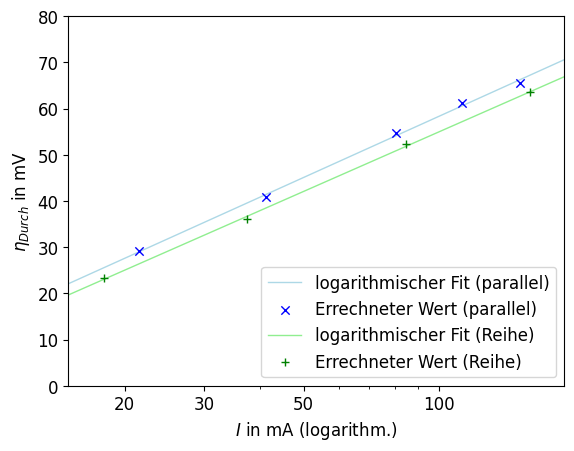

In [159]:
from scipy.optimize import curve_fit

## parallel

#plt.xlim(0, 200)
plt.ylim(0,80)
u0Parallel = uDataParallelVoltMean[0]
u0Reihe = uDataReiheVoltMean[0]
print("u0Parallel:", u0Parallel)
print("u0Reihe:", u0Reihe)
def calcEtaDurch(iData, uData, u0, ohmSlope):# ohm slope must be negative
    return u0 - uData + ohmSlope * iData
print("Ohm slope:", ohmSlope)
parallelStartIdx = 3
parallelStopIdx = 8
reiheStopIdx = 5
etaParallel = calcEtaDurch(iDataParallelAmpereMean[parallelStartIdx:parallelStopIdx], 
                              uDataParallelVoltMean[parallelStartIdx:parallelStopIdx], u0Parallel, ohmSlope)
etaReihe = calcEtaDurch(iDataReiheAmpereMean[:reiheStopIdx], uDataReiheVoltMean[:reiheStopIdx], u0Reihe, ohmSlope)

plt.xlabel("$I$ in mA (logarithm.)")
plt.ylabel("$\eta_{Durch}$ in mV ")
plt.xscale("log")


def theory_function(I, a, b):
    return a * np.log(I * b)

# Fit the parallel data
parallel_opt_params, _ = curve_fit(theory_function, iDataParallelAmpereMean[parallelStartIdx:parallelStopIdx], etaParallel)
parallel_a, parallel_b = parallel_opt_params
print("Parallel Optimal Parameters:")
print("a =", parallel_a)
print("b =", parallel_b)

# Fit the reihe data
reihe_opt_params, _ = curve_fit(theory_function, iDataReiheAmpereMean[1:reiheStopIdx], etaReihe[1:])
reihe_a, reihe_b = reihe_opt_params
print("Reihe Optimal Parameters:")
print("a =", reihe_a)
print("b =", reihe_b)

linsp = np.linspace(0.001, 0.3, 1000)
# Generate data for the fitted curves
parallel_fit_data = theory_function(linsp, parallel_a, parallel_b)
reihe_fit_data = theory_function(linsp, reihe_a, reihe_b)

# Plot the fitted curves

plt.plot(linsp*1000, parallel_fit_data*1000, label="logarithmischer Fit (parallel)", color="lightblue", zorder=0)
plt.scatter(iDataParallelAmpereMean[parallelStartIdx:parallelStopIdx]*1000, 
            1000*etaParallel, label="Errechneter Wert (parallel)", color="blue", zorder=3)

plt.plot(linsp*1000, reihe_fit_data*1000, label="logarithmischer Fit (Reihe)", color="lightgreen", zorder=0)
plt.scatter(iDataReiheAmpereMean[:reiheStopIdx]*1000, 
            1000*etaReihe, label="Errechneter Wert (Reihe)", color="green", marker="+", zorder=3)


plt.xticks([20, 30, 50, 100,200], ["20","30", "50", "100", "200"])
plt.xlim(15, 190)

plt.legend(loc="lower right")

T = 298.15
R = 8.314
def calculateAlphaFromVorfaktor(vorfaktor):
    return 1 - (R * T) / (2 * f * vorfaktor)

print("Parallel alpha:", calculateAlphaFromVorfaktor(parallel_a))
print("Reihe alpha:", calculateAlphaFromVorfaktor(reihe_a))

print("Parallel I0:", -1 / parallel_b)
print("Reihe I0:", -1 / reihe_b)
